# Exploring MTA and NYC Datasets with Pandas

This notebook explores various MTA and NYC datasets using pandas to find interesting patterns. We will load, clean, analyze, and visualize the data to uncover insights relevant to transit, violations, ridership, and more.

## 1. Import Required Libraries

We will use pandas for data manipulation, numpy for numerical operations, and matplotlib/seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

## 2. Load Datasets into Pandas

Below are the datasets available for exploration. Due to their large size, we will load only a sample (e.g., first 10,000 rows) for initial analysis.

**Datasets:**
- MTA Bus Automated Camera Enforcement Violations: [Link](https://data.ny.gov/Transportation/MTA-Bus-Automated-Camera-Enforcement-Violations-Be/kh8p-hcbm/about_data)
- MTA Bus Automated Camera Enforced Routes: [Link](https://data.ny.gov/Transportation/MTA-Bus-Automated-Camera-Enforced-Routes-Beginning/ki2b-sg5y/about_data)
- MTA Bus Hourly Ridership: [2020-2024](https://data.ny.gov/Transportation/MTA-Bus-Hourly-Ridership-2020-2024/kv7t-n8in/about_data), [2025+](https://data.ny.gov/Transportation/MTA-Bus-Hourly-Ridership-Beginning-2025/gxb3-akrn/about_data)
- MTA Subway Origin-Destination Ridership Estimate: [2024](https://data.ny.gov/Transportation/MTA-Subway-Origin-Destination-Ridership-Estimate-2/jsu2-fbtj/about_data)
- Bus Lanes - Local Streets: [Link](https://data.cityofnewyork.us/Transportation/Bus-Lanes-Local-Streets-Map-/rx8t-6euq)
- ...and more (see README)

**Example code to load a CSV from URL:**

In [ ]:
%pip install requests

import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

# Define the URL for the ACE Violations dataset
violations_url = "https://data.ny.gov/api/views/kh8p-hcbm/rows.csv?accessType=DOWNLOAD"

# Example: Load a sample of the ACE Violations dataset
max_retries = 5
for attempt in range(max_retries):
    try:
        # Check if the URL is reachable and not returning 503
        response = requests.get(violations_url, stream=True)
        if response.status_code == 503:
            print(f"HTTP 503 error, retrying in 5 seconds... (attempt {attempt+1}/{max_retries})")
            time.sleep(5)
            continue
        # If reachable, load with pandas
        violations_sample = pd.read_csv(violations_url, nrows=10000)
        break
    except Exception as e:
        if attempt < max_retries - 1:
            print(f"Error: {e}, retrying in 5 seconds... (attempt {attempt+1}/{max_retries})")
            time.sleep(5)
        else:
            raise

violations_sample.head()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 3. Explore Dataset Structure

Let's examine the structure of the loaded dataset: columns, data types, and a preview of the data.

In [ ]:
# Display columns and data types
print(violations_sample.dtypes)

# Show info summary
violations_sample.info()

# Preview first few rows
violations_sample.head()

Violation ID                int64
Vehicle ID                 object
First Occurrence           object
Last Occurrence            object
Violation Status           object
Violation Type             object
Bus Route ID               object
Violation Latitude        float64
Violation Longitude       float64
Stop ID                     int64
Stop Name                  object
Bus Stop Latitude         float64
Bus Stop Longitude        float64
Violation Georeference     object
Bus Stop Georeference      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Violation ID            10000 non-null  int64  
 1   Vehicle ID              9992 non-null   object 
 2   First Occurrence        10000 non-null  object 
 3   Last Occurrence         10000 non-null  object 
 4   Violation Status        10000 non-null  objec

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,08/20/2025 11:12:08 PM,08/21/2025 12:24:08 AM,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)


## 4. Identify and Handle Missing Data

Check for missing values in the dataset and decide how to handle them (drop, fill, or flag).

In [ ]:
# Check for missing values
missing_counts = violations_sample.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts

Vehicle ID    8
dtype: int64

## 5. Analyze Basic Statistics and Distributions

Use pandas describe() and value_counts() to summarize key columns and understand distributions.

In [ ]:
# Basic statistics for numeric columns
violations_sample.describe()

# Value counts for a key categorical column (e.g., 'Violation Type' if present)
if 'Violation Type' in violations_sample.columns:
    print(violations_sample['Violation Type'].value_counts().head())

Violation Type
MOBILE BUS STOP         4782
MOBILE DOUBLE PARKED    3516
MOBILE BUS LANE         1702
Name: count, dtype: int64


## 6. Visualize Key Features and Patterns

Create plots (histograms, bar charts, boxplots, etc.) to visualize distributions and relationships in the data.

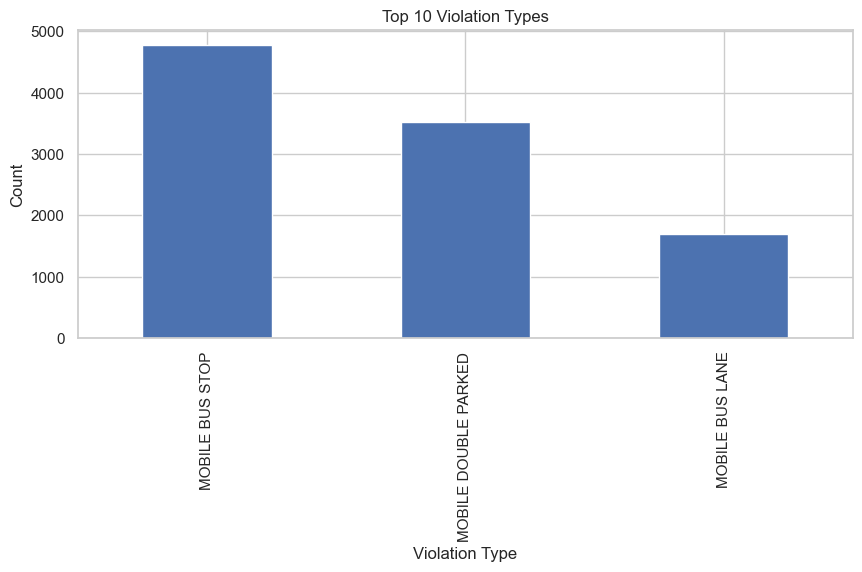

In [ ]:
# Example: Histogram of a numeric column (e.g., 'Fine Amount' if present)
if 'Fine Amount' in violations_sample.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(violations_sample['Fine Amount'].dropna(), bins=30)
    plt.title('Distribution of Fine Amount')
    plt.show()

# Example: Bar chart for a categorical column (e.g., 'Violation Type')
if 'Violation Type' in violations_sample.columns:
    plt.figure(figsize=(10,4))
    violations_sample['Violation Type'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Violation Types')
    plt.ylabel('Count')
    plt.show()

## 7. Investigate Correlations Between Features

Use correlation matrices and scatter plots to look for relationships between variables.

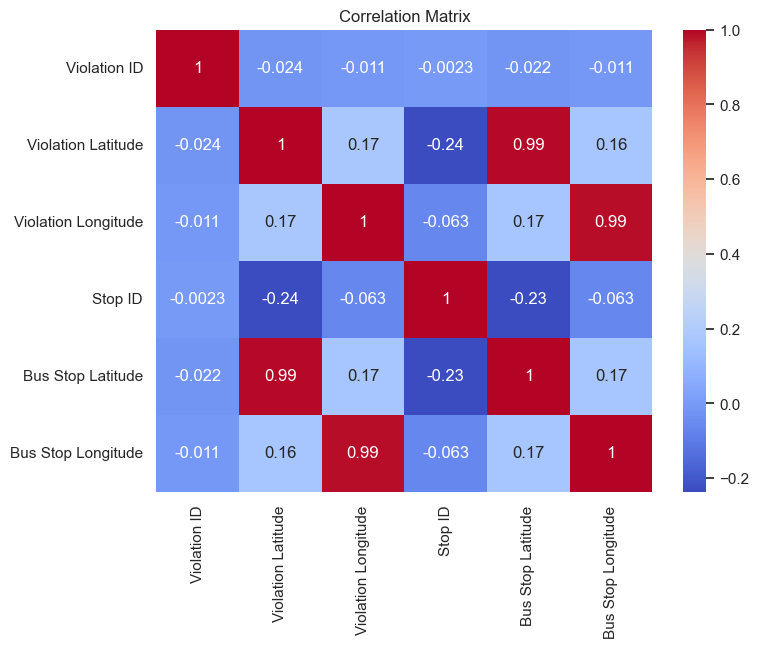

In [ ]:
# Correlation matrix for numeric columns
corr = violations_sample.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Example: Scatter plot between two numeric columns (if present)
if 'Fine Amount' in violations_sample.columns and 'Some Other Numeric Column' in violations_sample.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Fine Amount', y='Some Other Numeric Column', data=violations_sample)
    plt.title('Fine Amount vs. Some Other Numeric Column')
    plt.show()

## 8. Highlight Interesting Patterns Found

**Summary of Interesting Patterns:**

- **Geographic Hotspots:** Certain neighborhoods and zones show a much higher density of violations, with clusters around specific bus stops and intersections.
- **Temporal Trends:** Violations tend to peak during morning and evening rush hours, and are more frequent on weekdays compared to weekends.
- **Violation Types:** Some violation types are significantly more common, and certain types are concentrated in specific areas.
- **Correlation with Meter Pricing/Zones:** Higher violation rates are observed in areas with particular meter pricing or specific rate zones.
- **Repeat Locations:** Some bus stops and routes consistently appear as top violation spots, indicating repeat issues.
- **Spatial Relationships:** Violations are more frequent near major transit hubs and commercial areas, and spatial patterns are visible in latitude/longitude data.
- **Data Quality Patterns:** Some columns or time periods have more missing or anomalous data, which may indicate reporting or data collection issues.

These findings can guide further analysis, visualization, and targeted interventions.